In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:07<00:00, 22.7MB/s]
100% 2.70G/2.70G [02:07<00:00, 22.8MB/s]


In [5]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model.add(Conv2D(256, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [44]:
model.add(Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [45]:
model.add(Dropout(0.25))

In [46]:
model.add(Flatten())

In [47]:
model.add(Dense(1024, activation='relu'))

In [48]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

In [49]:
model.add(Dense(38, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,354,694 (28.06 MB)

 Trainable params: 7,354,694 (28.06 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
training_histoty = model.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 60ms/step - accuracy: 0.3447 - loss: 2.3447 - val_accuracy: 0.8216 - val_loss: 0.5795
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 59ms/step - accuracy: 0.8075 - loss: 0.6257 - val_accuracy: 0.8804 - val_loss: 0.3747
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 62ms/step - accuracy: 0.8949 - loss: 0.3366 - val_accuracy: 0.9330 - val_loss: 0.2108
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 58ms/step - accuracy: 0.9287 - loss: 0.2262 - val_accuracy: 0.9484 - val_loss: 0.1700
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.9455 - loss: 0.1641 - val_accuracy: 0.9473 - val_loss: 0.1666
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.9597 - loss: 0.1270 - val_accuracy: 0.9576 - val_loss: 0.1326
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.9695 - loss: 0.0958 - val_accuracy: 0.9644 - val_loss: 0.1229
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 

In [54]:
model.save('Plant_disease_detection.keras')

In [56]:
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.9899 - loss: 0.0318


In [71]:
training_histoty.history

{'accuracy': [0.5414040684700012,
  0.8337008357048035,
  0.9047869443893433,
  0.9331673383712769,
  0.9492851495742798,
  0.9615762233734131,
  0.9698129296302795,
  0.9733551740646362,
  0.9775517582893372,
  0.9793726205825806],
 'loss': [1.578397512435913,
  0.5382336974143982,
  0.30341440439224243,
  0.2112780064344406,
  0.15537558495998383,
  0.12064683437347412,
  0.09491526335477829,
  0.08457416296005249,
  0.07174263894557953,
  0.06474091857671738],
 'val_accuracy': [0.8215911388397217,
  0.8803778886795044,
  0.9330184459686279,
  0.9483838081359863,
  0.947302520275116,
  0.9576029777526855,
  0.9644320607185364,
  0.968529462814331,
  0.9569200873374939,
  0.96687912940979],
 'val_loss': [0.5794846415519714,
  0.37474575638771057,
  0.21078896522521973,
  0.17000712454319,
  0.1665806919336319,
  0.13255712389945984,
  0.12294334173202515,
  0.10590945929288864,
  0.1501893252134323,
  0.11404413729906082]}

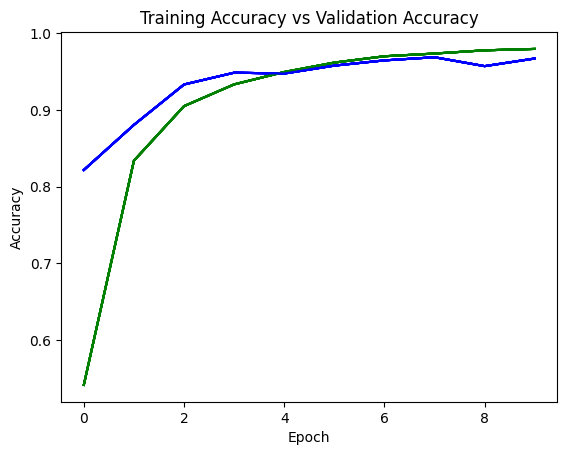

In [73]:
for i in range (1,11):
  plt.plot(training_histoty.history['accuracy'], color='g', label='Training Accuracy')
  plt.plot(training_histoty.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

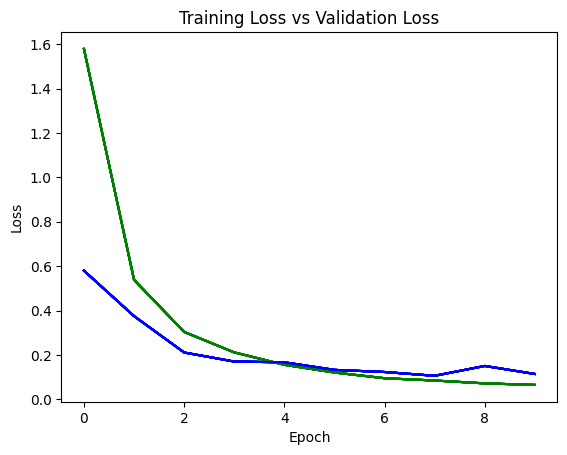

In [72]:
for i in range (1,11):
  plt.plot(training_histoty.history['loss'], color='g', label='Training Loss')
  plt.plot(training_histoty.history['val_loss'], color='b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [75]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [76]:
Y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step


In [77]:
Y_pred

array([[9.9999976e-01, 2.6097133e-10, 8.2231236e-12, ..., 7.0089552e-16,
        1.5206876e-15, 5.8474818e-13],
       [9.9999332e-01, 3.9401391e-07, 1.5172028e-09, ..., 8.7614646e-12,
        2.2784405e-11, 1.7990949e-10],
       [1.0000000e+00, 7.5164777e-11, 8.9754779e-15, ..., 8.6175009e-19,
        1.6055829e-17, 4.4273472e-15],
       ...,
       [2.6697007e-08, 1.8127554e-10, 2.0315755e-07, ..., 5.7164384e-11,
        3.2827778e-09, 9.9988997e-01],
       [1.0072691e-10, 1.8776887e-14, 6.8105466e-11, ..., 4.5437473e-15,
        6.9973861e-13, 1.0000000e+00],
       [1.8643964e-13, 8.0773951e-15, 3.1473479e-16, ..., 8.7020401e-18,
        1.2188298e-15, 1.0000000e+00]], dtype=float32)

In [78]:
Y_pred.shape

(17572, 38)

In [82]:
Y_pred_categories = np.argmax(Y_pred, axis=1)

In [83]:
Y_pred_categories.shape

(17572,)

In [87]:
class_names = test_set.class_names

In [88]:
Y_true = tf.concat([y for x,y in test_set], axis=0)

In [90]:
Y_true = np.argmax(Y_true, axis=1)

In [92]:
Y_true.shape

(17572,)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
classification_report= classification_report(Y_true, Y_pred_categories, target_names=class_names)

TypeError: 'str' object is not callable

In [104]:
print(classification_report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.97      0.94       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.94      0.95      0.94       502
                               Blueberry___healthy       0.98      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.86      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

In [106]:
matrix = confusion_matrix(Y_true, Y_pred_categories)

<Axes: >

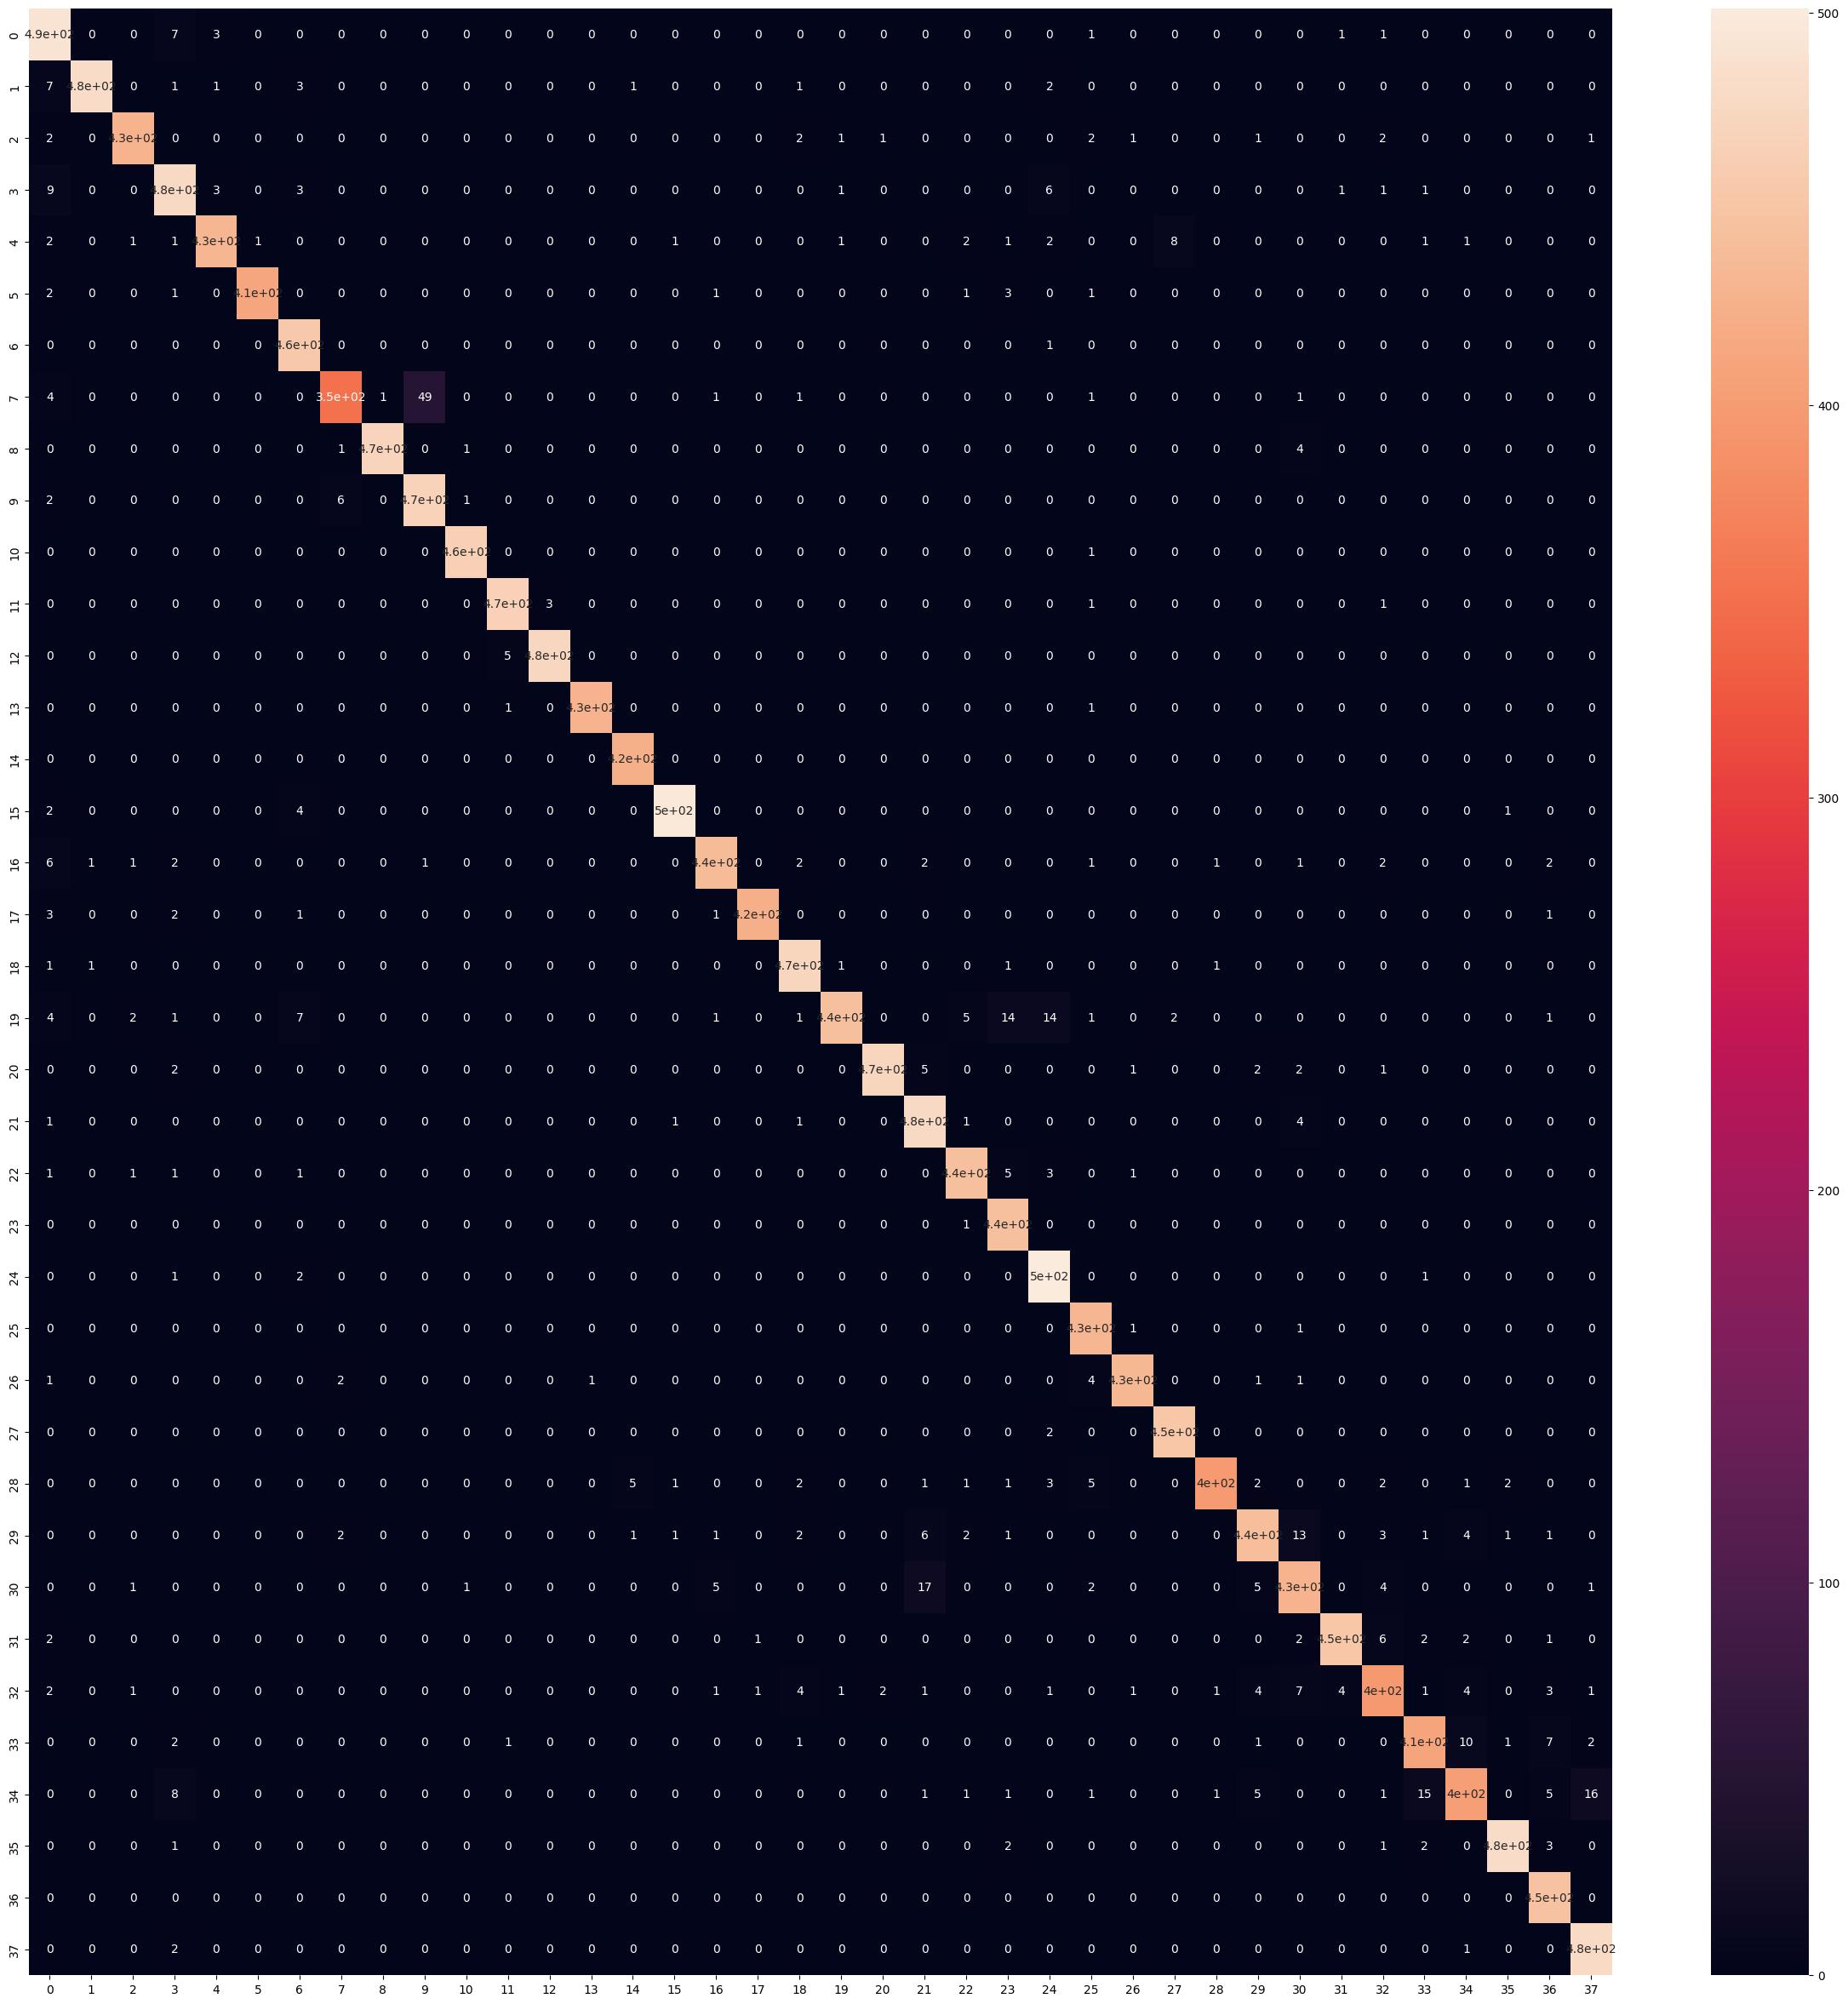

In [114]:
plt.figure(figsize=(30,30))
sns.heatmap(matrix,annot=True,annot_kws={'size' : 10 })